*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds


print(tf.__version__)

2.7.0


In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-12-29 10:24:06--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.03s   

2021-12-29 10:24:06 (10.6 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2021-12-29 10:24:06--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
train_data = pd.read_csv(train_file_path, sep="\t", header=None)
train_data.head()

,0,1
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [ ]:
train_data.columns = ['label', 'text']
train_data.head()

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [ ]:
test_data = pd.read_csv(test_file_path, sep="\t", header=None)
test_data.head()

,0,1
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [ ]:
test_data.columns = ['label', 'text']
test_data.head()

,label,text
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4179 non-null   object
 1   text    4179 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1392 non-null   object
 1   text    1392 non-null   object
dtypes: object(2)
memory usage: 21.9+ KB


In [ ]:
train_data.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
test_data.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
train_data['label'].value_counts()/train_data.shape[0]

ham     0.865997
spam    0.134003
Name: label, dtype: float64

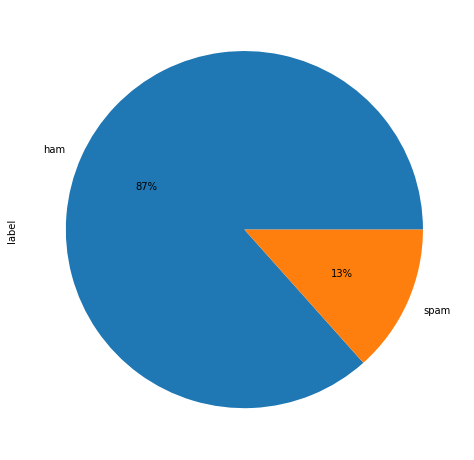

In [ ]:
plt.rcParams["figure.figsize"] = [8,10] 
train_data.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

The result shows that 13% of all the train data messages are spam while 87% of the messages are ham.

In [ ]:
train_data.tail()

,label,text
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...
4178,ham,tell my bad character which u dnt lik in me. ...


In [ ]:
y_train = train_data['label'].astype('category').cat.codes
y_test  = test_data['label'].astype('category').cat.codes
y_train.tail()

4174    0
4175    0
4176    1
4177    1
4178    0
dtype: int8

**Preprocessing**

In [ ]:
import re
import nltk
from nltk import stem
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')   # download vocab for lemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stemmer = stem.SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [ ]:
def clean_messages(text):
  text = re.sub(r'([^\s\w])+'," ",text)
  text = text.lower()
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords]
  text = " ".join(text)
  return text

In [ ]:
X_train = train_data['text'].apply(lambda x: clean_messages(x))
X_train.head()

0    ahhhh woken bad dream u tho dont like u right ...
1                                        never nothing
2    u sound like manky scouse boy steve like trave...
3    mum say wan go go shun bian watch da glass exh...
4    never lei v lazy got wat dat day ü send da url...
Name: text, dtype: object

In [ ]:
X_test = test_data['text'].apply(lambda x: clean_messages(x))
X_test.head()

0                      hospital da return home evening
1                                     much textin bout
2    probably eat today think gonna pop weekend u miss
3    give flying monkey wot think certainly mind fr...
4                                               seeing
Name: text, dtype: object

**Vectorize**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

In [ ]:
# convert to sequence of integers
X_train_sequence = tokenizer.texts_to_sequences(X_train)
print(X_train_sequence[0])

[309, 227, 1, 587, 42, 15, 1, 90, 359, 13, 103, 54, 228, 86]


Each integer corresponds to a word in the vocabulary, that's what the neural network needs. However, the samples don't have the same length, we need a way to have a fixed-length sequence.

In [ ]:
X_train_sequence = sequence.pad_sequences(X_train_sequence, maxlen=500)
X_train_sequence[:5]

array([[  0,   0,   0, ...,  54, 228,  86],
       [  0,   0,   0, ...,   0, 195, 252],
       [  0,   0,   0, ...,   6, 338, 422],
       [  0,   0,   0, ...,   8, 243,  43],
       [  0,   0,   0, ..., 124,  70,  24]], dtype=int32)

Apply the same vectorization process to the messages of the test data 

In [ ]:
X_test_sequence = tokenizer.texts_to_sequences(X_test)
print(X_test_sequence[0])

[43, 868, 37, 402]


In [ ]:
X_test_sequence = sequence.pad_sequences(X_test_sequence, maxlen=500)
X_test_sequence[:5]

array([[  0,   0,   0, ..., 868,  37, 402],
       [  0,   0,   0, ...,   0,  60, 657],
       [  0,   0,   0, ..., 248,   1,  99],
       [  0,   0,   0, ..., 230,  69, 644],
       [  0,   0,   0, ...,   0,   0, 706]], dtype=int32)

**Build model**

In [ ]:
# Keep top 1000 frequently occurring words
max_words = 1000

# Cut off the words after seeing 500 words in each document
max_len = 500

In [ ]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.Input(shape = [max_len]))
lstm_model.add(tf.keras.layers.Embedding(max_words,50,input_length=max_len))
lstm_model.add(tf.keras.layers.LSTM(64))
lstm_model.add(tf.keras.layers.Dense(256, activation = 'relu'))               
lstm_model.add(tf.keras.layers.Dropout(0.5))               
lstm_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
lstm_model.summary()  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 256)               16640     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
lstm_model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics=['accuracy'])
history = lstm_model.fit(X_train_sequence, y_train, batch_size = 128, epochs=10,
          validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.0001)])

Epoch 1/10
27/27 [==============================] - 6s 136ms/step - loss: 0.3540 - accuracy: 0.8675 - val_loss: 0.1773 - val_accuracy: 0.9462
Epoch 2/10
27/27 [==============================] - 3s 114ms/step - loss: 0.1183 - accuracy: 0.9722 - val_loss: 0.0941 - val_accuracy: 0.9844


In [ ]:
accuracy = lstm_model.evaluate(X_test_sequence, y_test, verbose = 2)

44/44 - 1s - loss: 0.0894 - accuracy: 0.9828 - 1s/epoch - 32ms/step


In [ ]:
#preprocess for pred_text
def pre_process(pred_text):
  pred_text = pred_text.apply(lambda x: clean_messages(x))
  
  pred_text_sequence = tokenizer.texts_to_sequences(pred_text)
  pred_text_sequence = sequence.pad_sequences(pred_text_sequence, maxlen=500)
  return pred_text_sequence

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  text = pre_process(pd.Series([pred_text]))
  prediction = []
  result = lstm_model.predict(text)[0]
  if result[0] < 0.5:
    prediction.append(result[0])
    prediction.append('ham')
  else:
    prediction.append(result[0])
    prediction.append('spam')

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[0.021382887, 'ham']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
